<a href="https://colab.research.google.com/github/RufinoMartin/DataScience2021/blob/main/Indices_Bursatiles_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

La finalidad de este notebook es proveer variable/s para producir principalmente analisis uni y bivariados.
Posteriormente formará parte del dataframe final. 


Este notebook Reune del periodo 1/2019 a 3/2022, los precios de los indices mundiales mas importantes, en su dataframe. 

Indices utilizados:

 -  DOLAR : "DYX" (The U.S. Dollar Index is used to measure the value of the dollar against a basket of six world currencies: Euro, Swiss Franc, Japanese Yen, Canadian dollar, British pound, and Swedish Krona)  
 
 -  USA : "S&P500" ("Standard and Poor 500" is a stock market index tracking the performance of 500 large companies listed on stock exchanges in the United States)

-  CHINA: "SHA" (The Shanghai Stock Exchange is one of the three stock exchanges operating independently in mainland China. The Shanghai Stock Exchange is the world's 3rd largest stock market by market capitalization at US$7.62 trillion as of July 2021)

-  EUROPA : 
   
   "UKX" (The "FTSE 100 Index" The Financial Times Stock Exchange 100 Index, is a share index of the 100 companies listed on the London Stock Exchange with the highest market capitalisation. 

   "SX5P" (The STOXX Europe 50 index provides a blue-chip representation of supersector leaders in Europe covering almost 50% of the free-float market capitalization of the European stock market.)  



In [1]:
# Importacion Librerias

import pandas as pd
import pandas_profiling
from functools import reduce
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.ticker import FormatStrFormatter


El presente notebook parte de un .csv previamente producido que reune y ordena dichos indices.
Para acceder al notebook preliminar:

https://github.com/RufinoMartin/DataScience2021/blob/main/Indices%20Bursatiles%20.ipynb

Si la importacion no se realiza, es porque el token caducó. Dirigirse a

https://github.com/RufinoMartin/DataScience2021/blob/main/Indices%20Bursatiles.csv , 
apretar "Raw", y copiar y pegar el URL abajo en read_csv(' '), 
y volver a correr. 

In [2]:
df_indices = pd.read_csv('https://raw.githubusercontent.com/RufinoMartin/DataScience2021/main/Indices%20Bursatiles.csv?token=GHSAT0AAAAAABRYGSF2KPSEGFA5IAV54FZAYRXL74Q')


In [3]:
df_indices.drop(columns={'Unnamed: 0'}, inplace=True)
df_indices.head(5)

,Fecha,$DYX,$S&P500,$SHA,$UKX,$SX5P
0,01/2019,95.58,2704.10,2584.57,6968.85,2897.13
1,02/2019,96.16,2709.80,2940.95,7074.73,3029.67
2,03/2019,97.28,2834.40,3090.76,7279.19,3117.01
3,04/2019,97.48,2945.83,3078.34,7418.22,3199.51
4,05/2019,97.61,2752.06,2898.70,7161.71,3042.89


In [4]:
df_indices.head(5)

,Fecha,$DYX,$S&P500,$SHA,$UKX,$SX5P
0,01/2019,95.58,2704.10,2584.57,6968.85,2897.13
1,02/2019,96.16,2709.80,2940.95,7074.73,3029.67
2,03/2019,97.28,2834.40,3090.76,7279.19,3117.01
3,04/2019,97.48,2945.83,3078.34,7418.22,3199.51
4,05/2019,97.61,2752.06,2898.70,7161.71,3042.89


In [5]:
# Chequeamos

df_indices.dtypes

Fecha       object
$DYX       float64
$S&P500    float64
$SHA       float64
$UKX       float64
$SX5P      float64
dtype: object

In [ ]:
# Mejoramos la apariencia y usabilidad de la columna Fecha.

In [6]:
# Es necesario pasar la columna a tipo string primero, ya que es el tipo de datos que admite la funcion DateTime. 

df_indices['DateTime'] = pd.to_datetime(df_indices['Fecha'].astype(str), format='%m/%Y')
df_indices.head(3)

,Fecha,$DYX,$S&P500,$SHA,$UKX,$SX5P,DateTime
0,01/2019,95.58,2704.1,2584.57,6968.85,2897.13,2019-01-01
1,02/2019,96.16,2709.8,2940.95,7074.73,3029.67,2019-02-01
2,03/2019,97.28,2834.4,3090.76,7279.19,3117.01,2019-03-01


In [7]:
# Nos quedamos solo con DateTime.

df_indices.drop(columns={'Fecha'}, inplace=True)

In [8]:
# Reordenamos 

Tituloscolumnas = ['DateTime','$DYX','$S&P500','$SHA','$UKX','$SX5P']
df_indices = df_indices.reindex(columns=Tituloscolumnas)

In [9]:
df_indices.head(5)

,DateTime,$DYX,$S&P500,$SHA,$UKX,$SX5P
0,2019-01-01,95.58,2704.10,2584.57,6968.85,2897.13
1,2019-02-01,96.16,2709.80,2940.95,7074.73,3029.67
2,2019-03-01,97.28,2834.40,3090.76,7279.19,3117.01
3,2019-04-01,97.48,2945.83,3078.34,7418.22,3199.51
4,2019-05-01,97.61,2752.06,2898.70,7161.71,3042.89


In [10]:
#Renombramos todo el DF

df_Indices_Bursatiles = df_indices

In [11]:
#Guardamos cambios 

df_Indices_Bursatiles.to_csv('Indices_Bursatiles.csv')

ANALISIS UNIVARIADO

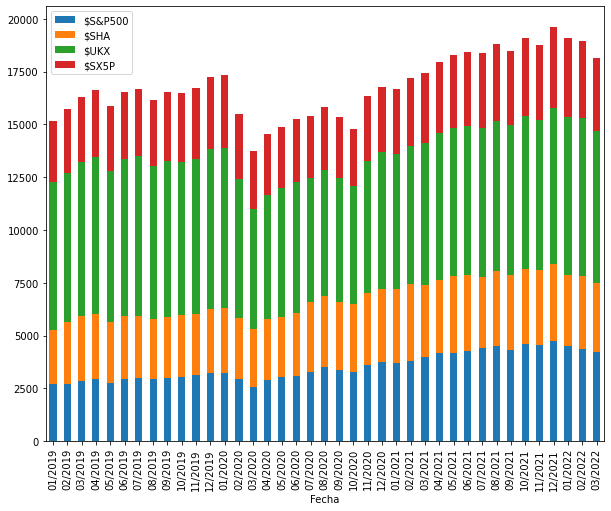

In [ ]:
# Graficamos unas barras apiladas para apreciar el volumen total y particular.

df_indices.plot.bar(x='Fecha',y=['$S&P500','$SHA','$UKX','$SX5P'], stacked=True, figsize=(10,8))


In [ ]:
#Seleccionamos el ultimo mes disponible para realizar una visualizacion

df_marzo22 = (df_indices.loc[[38]])
df_marzo22.drop(columns=['Fecha','$DYX'], inplace=True)    #Dejamos solo las variables a comparar
df_marzo22 =df_marzo22.transpose()       # Invertimos filas y columnas para facilitar la visualizacion
df_marzo22

,38
$S&P500,4204.31
$SHA,3309.75
$UKX,7155.64
$SX5P,3491.13


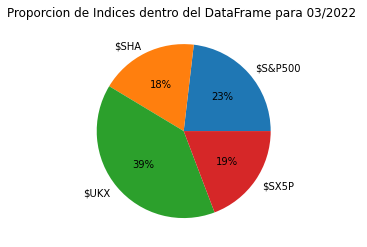

In [ ]:
# Hagamos un grafico de torta para visualizar cuanto ocupa cada Rubro dentro 
#   del indice promedio para el ultimo año


x = (df_marzo22[38])
labels = ['$S&P500','$SHA', '$UKX','$SX5P']

fig, ax = plt.subplots()
ax.pie(x, labels = labels,autopct='%.0f%%', radius=1)
ax.set_title('Proporcion de Indices dentro del DataFrame para 03/2022 ')
plt.show()

In [ ]:
#

In [ ]:
#